### Life Expectancy (WHO)

In [174]:
import time

In [2]:
# start_time=time.time()

### Import Libraries

In [185]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor,plot_tree 
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

### Data Gathering

In [4]:
df=pd.read_csv('Life_Expectancy_Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


### Dataset Discription

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
print(df.shape)

(2938, 22)


In [7]:
df.columns=['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population',
       'thinness_1_19_years', 'thinness_5_9_years',
       'Income_composition_of_resources', 'Schooling']

In [8]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'thinness_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [9]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV_AIDS                             0
GDP                                448
Population                         652
thinness_1_19_years                 34
thinness_5_9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [10]:
pd.set_option("display.max_columns",None)

In [11]:
df.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [12]:
df['Country'].nunique()

193

In [13]:
df['Year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000], dtype=int64)

In [14]:
df['Year'].isna().sum()

0

In [15]:
# No of unique values
for col in df.columns:
    print(f"{col}::{df[col].nunique()}")

Country::193
Year::16
Status::2
Life_expectancy::362
Adult_Mortality::425
infant_deaths::209
Alcohol::1076
percentage_expenditure::2328
Hepatitis_B::87
Measles::958
BMI::608
under_five_deaths::252
Polio::73
Total_expenditure::818
Diphtheria::81
HIV_AIDS::200
GDP::2490
Population::2278
thinness_1_19_years::200
thinness_5_9_years::207
Income_composition_of_resources::625
Schooling::173


In [16]:
df['Status'].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

In [17]:
df['Life_expectancy'].isna().sum()

10

<AxesSubplot: xlabel='Life_expectancy', ylabel='Density'>

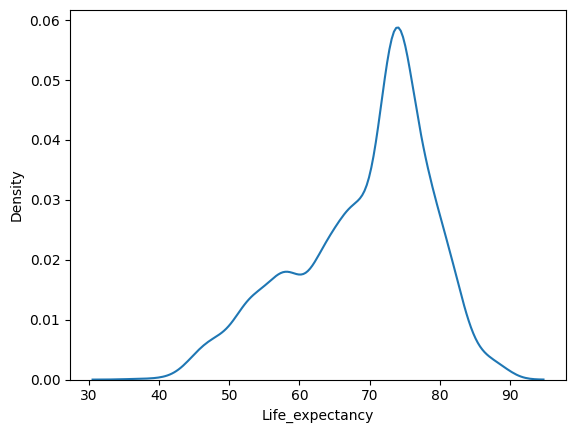

In [18]:
sns.kdeplot(df['Life_expectancy'])

In [19]:
df['Life_expectancy'].mean()

69.22493169398908

In [20]:
df['Life_expectancy'].median()

72.1

In [21]:
df['Life_expectancy'].min()

36.3

In [22]:
df['Life_expectancy'].max()

89.0

In [23]:
df.describe()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under_five_deaths                2938 non-null   int64  
 12  Polio               

In [25]:
df.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [26]:
df[['Country','Status']].isna().sum()

Country    0
Status     0
dtype: int64

In [27]:
from sklearn.preprocessing import OrdinalEncoder

In [28]:
oe=OrdinalEncoder()

In [29]:
df[['Country','Status']]=oe.fit_transform(df[['Country','Status']])

In [30]:
df['Country']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
2933    192.0
2934    192.0
2935    192.0
2936    192.0
2937    192.0
Name: Country, Length: 2938, dtype: float64

In [31]:
df['Status'].value_counts()

1.0    2426
0.0     512
Name: Status, dtype: int64

In [32]:
df['Life_expectancy'].isna().sum()

10

In [33]:
df['Life_expectancy']=df['Life_expectancy'].fillna(df['Life_expectancy'].mean())

In [34]:
df['Life_expectancy'].isna().sum()

0

<AxesSubplot: xlabel='Life_expectancy', ylabel='Density'>

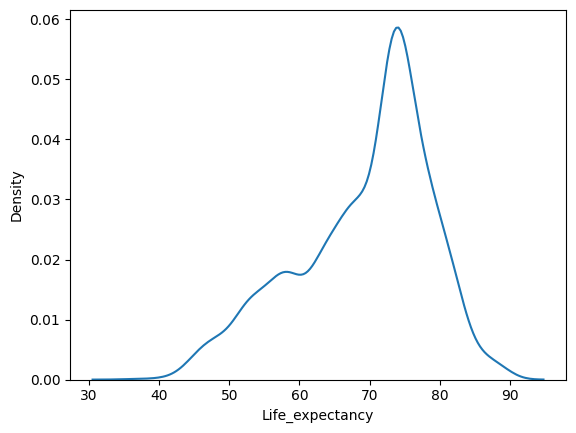

In [35]:
sns.kdeplot(df['Life_expectancy'])

In [36]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'thinness_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

### Adult_Mortality

In [37]:
df['Adult_Mortality'].isna().sum()

10

In [38]:
print(df['Adult_Mortality'].mean())
print(df['Adult_Mortality'].median())
print(df['Adult_Mortality'].mode()[0])

164.79644808743168
144.0
12.0


<AxesSubplot: xlabel='Adult_Mortality', ylabel='Density'>

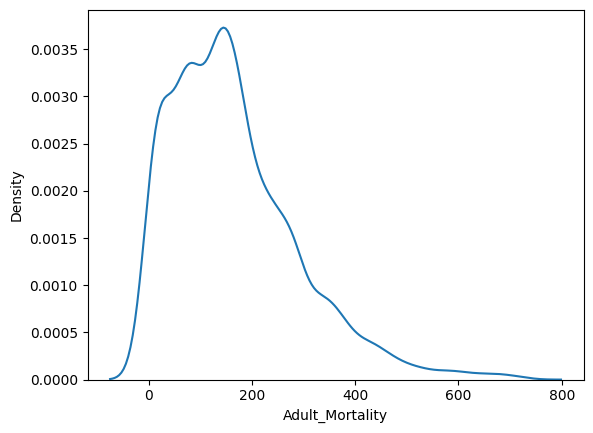

In [39]:
sns.kdeplot(df['Adult_Mortality'])

In [40]:
df['Adult_Mortality']=df['Adult_Mortality'].fillna(df['Adult_Mortality'].mean())

In [41]:
df['Adult_Mortality'].isna().sum()

0

<AxesSubplot: xlabel='Adult_Mortality', ylabel='Density'>

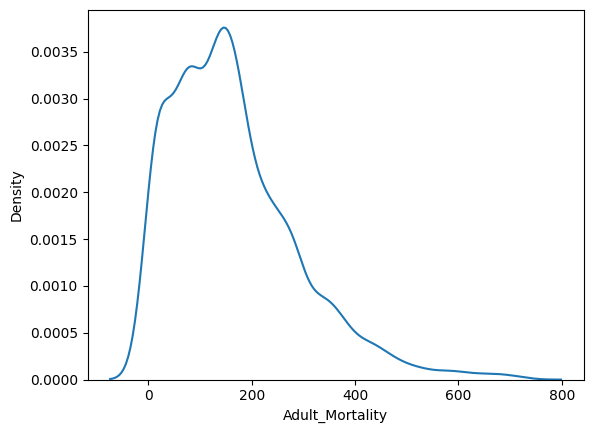

In [42]:
# After fillna value with mean value
sns.kdeplot(df['Adult_Mortality'])

In [43]:
df['infant_deaths'].isna().sum()

0

<AxesSubplot: xlabel='infant_deaths', ylabel='Density'>

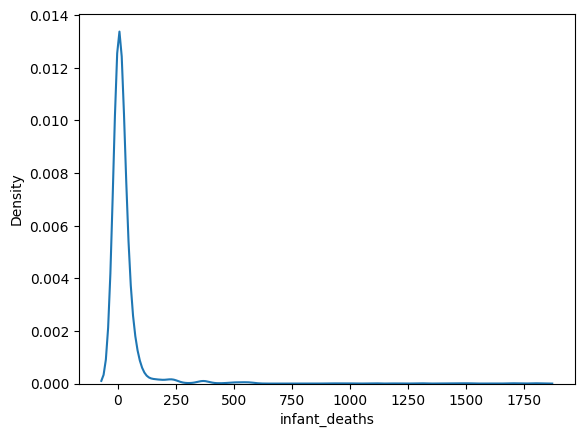

In [44]:
sns.kdeplot(df['infant_deaths'])

In [45]:
df['infant_deaths'].value_counts()

0      848
1      342
2      203
3      175
4       96
      ... 
171      1
201      1
215      1
253      1
110      1
Name: infant_deaths, Length: 209, dtype: int64

### Alcohol

In [46]:
df['Alcohol'].max()

17.87

In [47]:
df['Alcohol'].min()

0.01

<AxesSubplot: xlabel='Alcohol', ylabel='Density'>

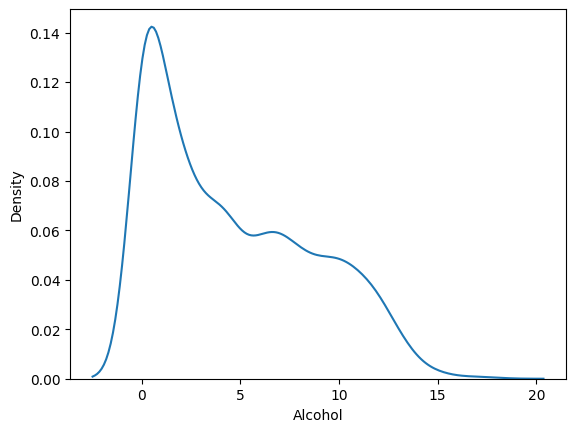

In [48]:
sns.kdeplot(df['Alcohol'])

In [49]:
print(df['Alcohol'].mean())
print(df['Alcohol'].median())
print(df['Alcohol'].mode()[0])

4.602860787172012
3.755
0.01


In [50]:
df['Alcohol'].isna().sum()

194

In [51]:
df['Alcohol']=df['Alcohol'].fillna(df['Alcohol'].mean())

In [52]:
df['Alcohol'].isna().sum()

0

<AxesSubplot: xlabel='Alcohol', ylabel='Density'>

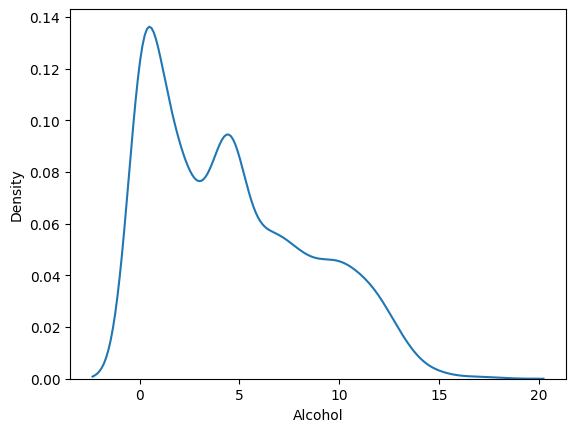

In [53]:
sns.kdeplot(df['Alcohol'])

In [54]:
df['percentage_expenditure'].mean()

738.2512954533831

In [55]:
print(df['percentage_expenditure'].max())
print(df['percentage_expenditure'].min())
print(df['percentage_expenditure'].mean())
print(df['percentage_expenditure'].median())

19479.91161
0.0
738.2512954533831
64.912906045


### percentage_expenditure

<AxesSubplot: xlabel='percentage_expenditure', ylabel='Density'>

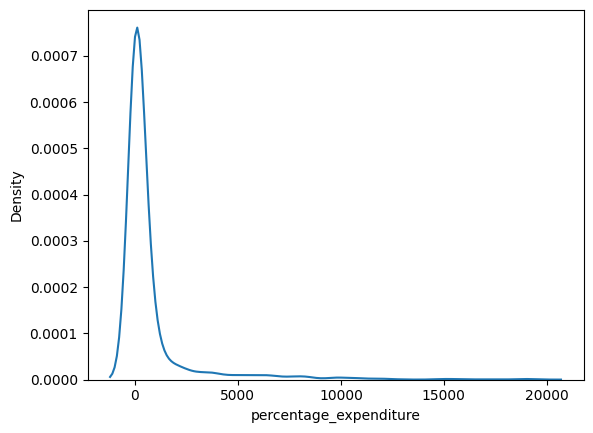

In [56]:
sns.kdeplot(df['percentage_expenditure'])

### Hepatitis_B

In [57]:
df['Hepatitis_B']

0       65.0
1       62.0
2       64.0
3       67.0
4       68.0
        ... 
2933    68.0
2934     7.0
2935    73.0
2936    76.0
2937    79.0
Name: Hepatitis_B, Length: 2938, dtype: float64

In [58]:
df['Hepatitis_B'].isna().sum()

553

<AxesSubplot: xlabel='Hepatitis_B', ylabel='Density'>

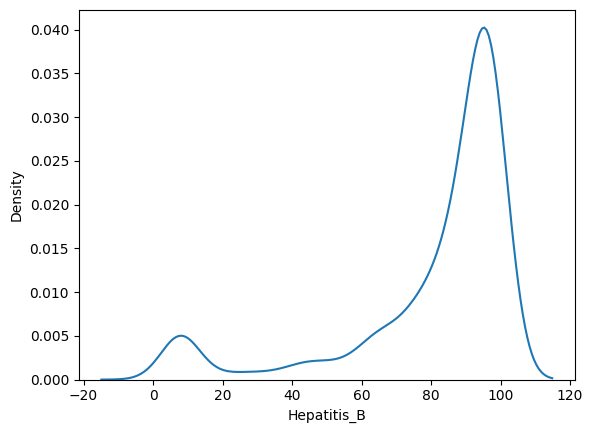

In [59]:
sns.kdeplot(df['Hepatitis_B'])

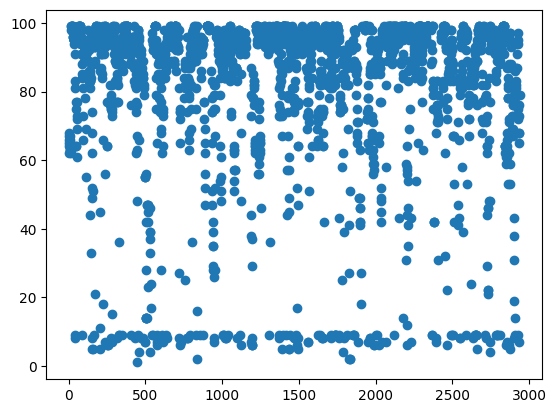

In [60]:
plt.scatter(df['Hepatitis_B'].index,df['Hepatitis_B'])

In [61]:
print(df['Hepatitis_B'].max())
print(df['Hepatitis_B'].min())
print(df['Hepatitis_B'].mean())
print(df['Hepatitis_B'].median())

99.0
1.0
80.94046121593291
92.0


In [62]:
df['Hepatitis_B'].isna().sum()

553

In [63]:
df['Hepatitis_B']=df['Hepatitis_B'].fillna(df['Hepatitis_B'].mean())

In [64]:
df['Hepatitis_B'].isna().sum()

0

<AxesSubplot: xlabel='Hepatitis_B', ylabel='Density'>

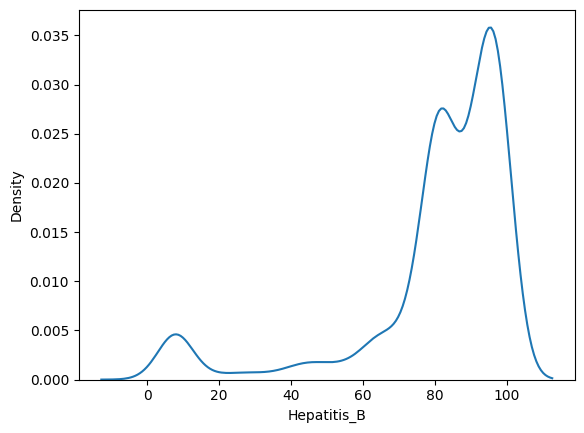

In [65]:
sns.kdeplot(df['Hepatitis_B'])

In [66]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'thinness_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [67]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                      0
Adult_Mortality                      0
infant_deaths                        0
Alcohol                              0
percentage_expenditure               0
Hepatitis_B                          0
Measles                              0
BMI                                 34
under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV_AIDS                             0
GDP                                448
Population                         652
thinness_1_19_years                 34
thinness_5_9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

### Measles

In [68]:
df['Measles']

0       1154
1        492
2        430
3       2787
4       3013
        ... 
2933      31
2934     998
2935     304
2936     529
2937    1483
Name: Measles, Length: 2938, dtype: int64

In [69]:
df['Measles'].nunique()

958

In [70]:
print(df['Measles'].max())
print(df['Measles'].min())
print(df['Measles'].mean())
print(df['Measles'].median())
print(df['Measles'].mode()[0])

212183
0
2419.5922396187884
17.0
0


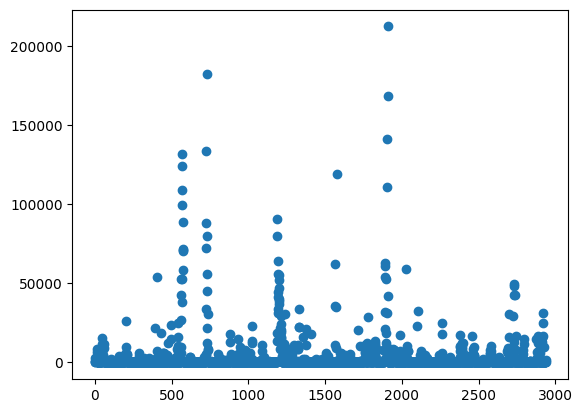

In [71]:
plt.scatter(df['Measles'].index,df['Measles'])

<AxesSubplot: xlabel='Measles', ylabel='Density'>

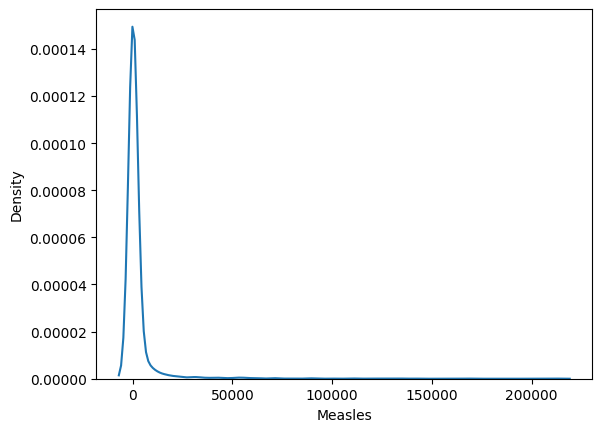

In [72]:
sns.kdeplot(df['Measles'])

### BMI

In [73]:
df['BMI']

0       19.1
1       18.6
2       18.1
3       17.6
4       17.2
        ... 
2933    27.1
2934    26.7
2935    26.3
2936    25.9
2937    25.5
Name: BMI, Length: 2938, dtype: float64

In [74]:
df['BMI'].nunique()

608

In [75]:
print(df['BMI'].max())
print(df['BMI'].min())
print(df['BMI'].mean())
print(df['BMI'].median())
print(df['BMI'].mode()[0])

87.3
1.0
38.321246556473824
43.5
58.5


<AxesSubplot: xlabel='BMI', ylabel='Density'>

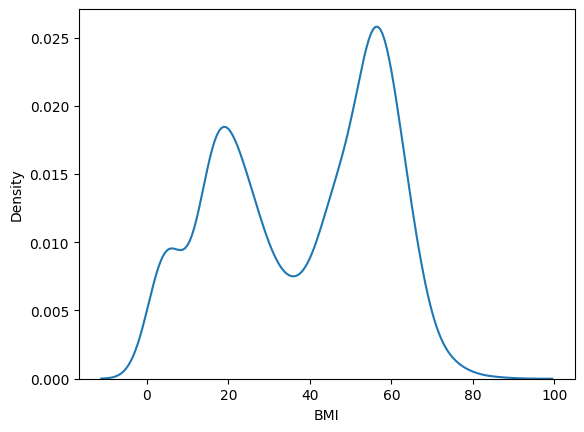

In [76]:
sns.kdeplot(df['BMI'])

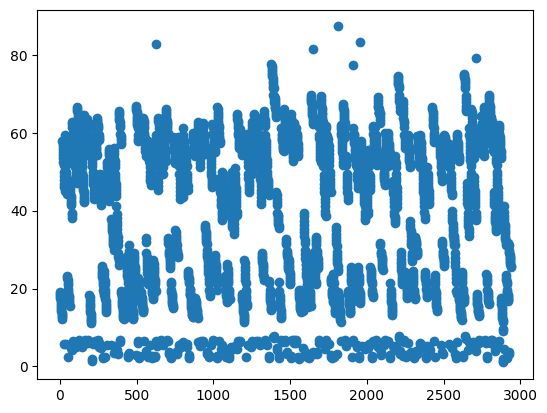

In [77]:
plt.scatter(df['BMI'].index,df['BMI'])

In [78]:
df['BMI'].isna().sum()

34

In [79]:
df['BMI']=df['BMI'].fillna(df['BMI'].median())

In [80]:
df['BMI'].isna().sum()

0

<AxesSubplot: xlabel='BMI', ylabel='Density'>

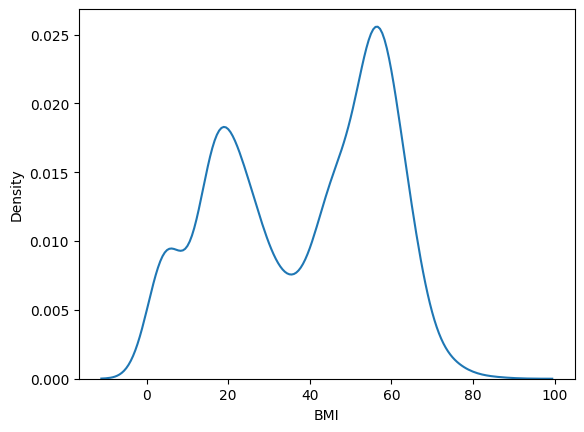

In [81]:
sns.kdeplot(df['BMI'])

### under_five_deaths

In [82]:
df['under_five_deaths']

0       83
1       86
2       89
3       93
4       97
        ..
2933    42
2934    41
2935    40
2936    39
2937    39
Name: under_five_deaths, Length: 2938, dtype: int64

In [83]:
df['under_five_deaths'].isna().sum()

0

In [84]:
print(df['under_five_deaths'].max())
print(df['under_five_deaths'].min())
print(df['under_five_deaths'].mean())
print(df['under_five_deaths'].median())
print(df['under_five_deaths'].mode()[0])

2500
0
42.0357385976855
4.0
0


<AxesSubplot: xlabel='under_five_deaths', ylabel='Density'>

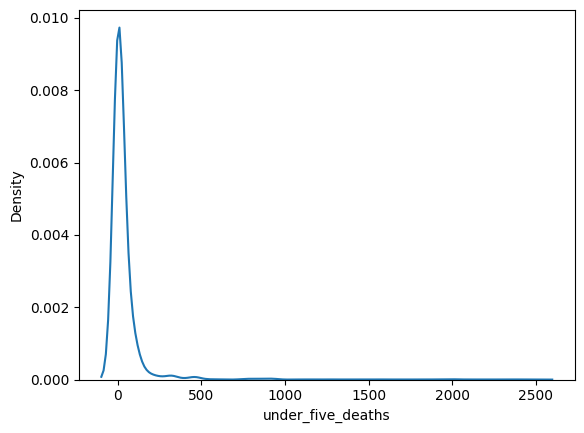

In [85]:
sns.kdeplot(df['under_five_deaths'])

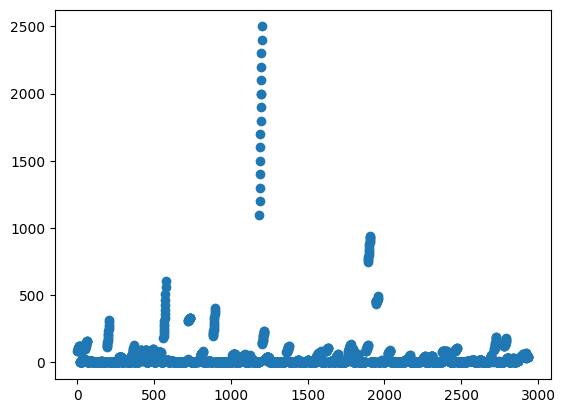

In [86]:
plt.scatter(df['under_five_deaths'].index,df['under_five_deaths'])

### Polio

In [87]:
df['Polio']

0        6.0
1       58.0
2       62.0
3       67.0
4       68.0
        ... 
2933    67.0
2934     7.0
2935    73.0
2936    76.0
2937    78.0
Name: Polio, Length: 2938, dtype: float64

In [88]:
df['Polio'].isna().sum()

19

<AxesSubplot: xlabel='Polio', ylabel='Density'>

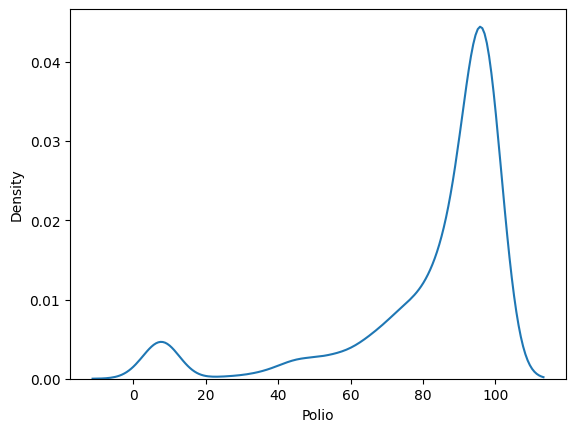

In [89]:
sns.kdeplot(df['Polio'])

In [90]:
print(df['Polio'].max())
print(df['Polio'].min())
print(df['Polio'].mean())
print(df['Polio'].median())
print(df['Polio'].mode()[0])

99.0
3.0
82.55018842069202
93.0
99.0


In [91]:
df['Polio'].unique()

array([ 6., 58., 62., 67., 68., 66., 63., 64.,  5., 41., 36., 35., 24.,
       99., 98., 97., 95., 94., 92., 88., 86., 87., 89.,  7., 75., 73.,
       81., 65., 39.,  4., 37.,  3., 96., 93., 91., 85.,  9., 83., 84.,
       82., 71.,  8., 79., 78., 77., 53., 74., 76., 69., 45., 72., 54.,
       59., 61., 57., 47., 23., 46., 44., 42., 38., 52., 51., 43., 32.,
       49., 31., 26., 17., 55., 48., 56., nan, 33.])

In [92]:
df['Polio']=df['Polio'].fillna(df['Polio'].median())

In [93]:
df['Polio'].isna().sum()

0

In [94]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'thinness_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

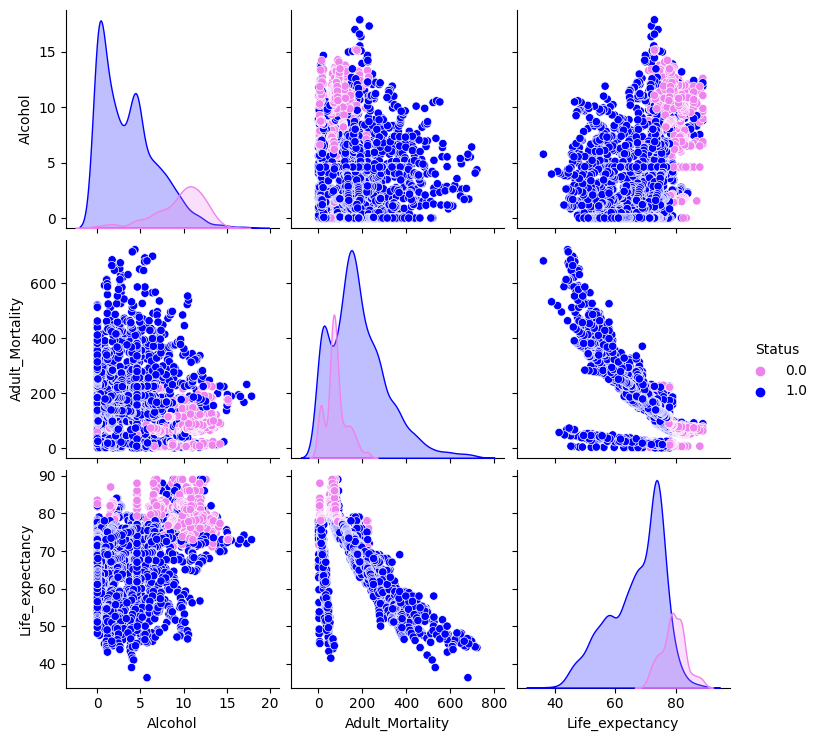

In [95]:
sns.pairplot(data=df[['Alcohol','Adult_Mortality','Life_expectancy','Status']],
            hue='Status',palette=['Violet','Blue']);
# 1 > Developing
# 0 > Developed

In [96]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'thinness_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

### Total_expenditure

In [97]:
df['Total_expenditure']

0       8.16
1       8.18
2       8.13
3       8.52
4       7.87
        ... 
2933    7.13
2934    6.52
2935    6.53
2936    6.16
2937    7.10
Name: Total_expenditure, Length: 2938, dtype: float64

In [98]:
df['Total_expenditure'].isna().sum()

226

<AxesSubplot: xlabel='Total_expenditure', ylabel='Density'>

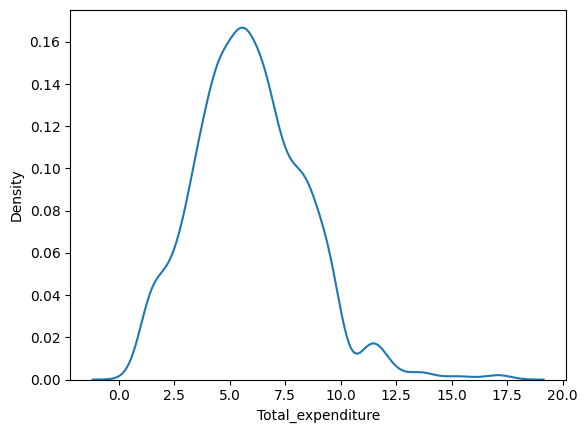

In [99]:
sns.kdeplot(df['Total_expenditure'])

In [100]:
print(df['Total_expenditure'].max())
print(df['Total_expenditure'].min())
print(df['Total_expenditure'].mean())
print(df['Total_expenditure'].median())
print(df['Total_expenditure'].mode()[0])

17.6
0.37
5.9381895280235995
5.755
4.6


In [101]:
df['Total_expenditure']=df['Total_expenditure'].fillna(df['Total_expenditure'].mean())

In [102]:
df['Total_expenditure'].isna().sum()

0

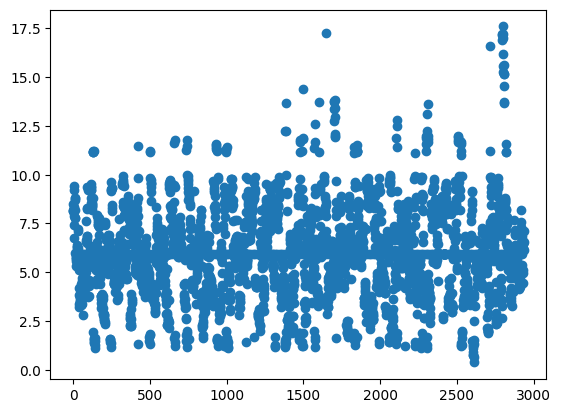

In [103]:
plt.scatter(df['Total_expenditure'].index,df['Total_expenditure'])

In [104]:
df['Diphtheria']

0       65.0
1       62.0
2       64.0
3       67.0
4       68.0
        ... 
2933    65.0
2934    68.0
2935    71.0
2936    75.0
2937    78.0
Name: Diphtheria, Length: 2938, dtype: float64

In [105]:
df['Diphtheria'].nunique()

81

In [106]:
df['Diphtheria'].isna().sum()

19

<AxesSubplot: xlabel='Diphtheria', ylabel='Density'>

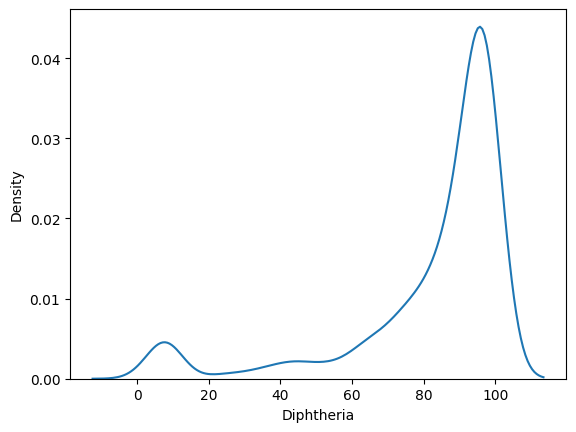

In [107]:
sns.kdeplot(df['Diphtheria'])

In [108]:
print(df['Diphtheria'].max())
print(df['Diphtheria'].min())
print(df['Diphtheria'].mean())
print(df['Diphtheria'].median())
print(df['Diphtheria'].mode()[0])

99.0
2.0
82.32408359027065
93.0
99.0


In [109]:
df['Diphtheria']=df['Diphtheria'].fillna(df['Diphtheria'].mean())

In [110]:
df['Diphtheria'].isna().sum()

0

In [111]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                      0
Adult_Mortality                      0
infant_deaths                        0
Alcohol                              0
percentage_expenditure               0
Hepatitis_B                          0
Measles                              0
BMI                                  0
under_five_deaths                    0
Polio                                0
Total_expenditure                    0
Diphtheria                           0
HIV_AIDS                             0
GDP                                448
Population                         652
thinness_1_19_years                 34
thinness_5_9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [112]:
df['HIV_AIDS'].nunique()

200

<AxesSubplot: xlabel='HIV_AIDS', ylabel='Density'>

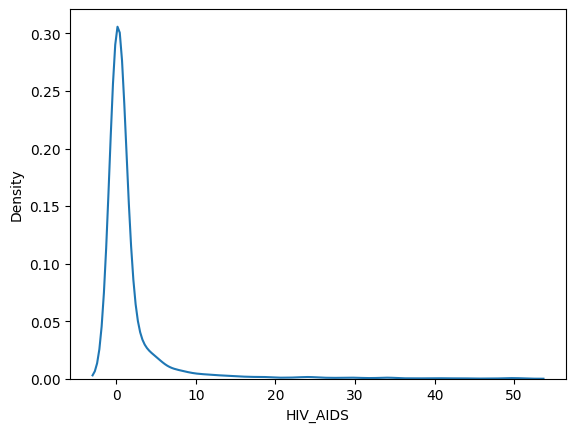

In [113]:
sns.kdeplot(df['HIV_AIDS'])

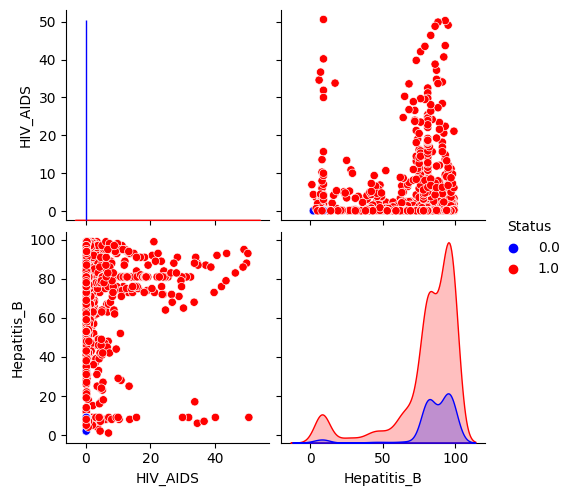

In [114]:
sns.pairplot(data=df[['HIV_AIDS','Hepatitis_B','Status']],
            hue='Status',palette=['blue','red']);

### GDP

<AxesSubplot: xlabel='GDP', ylabel='Density'>

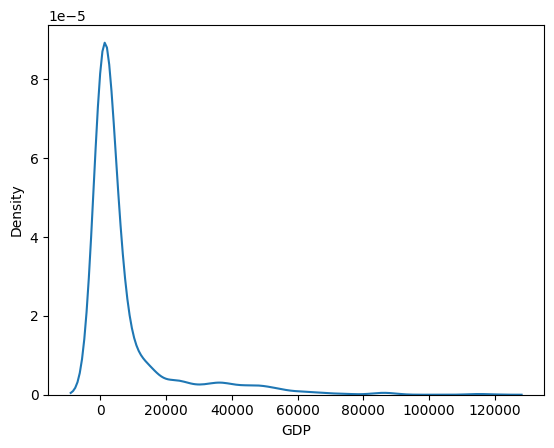

In [115]:
sns.kdeplot(df['GDP'])

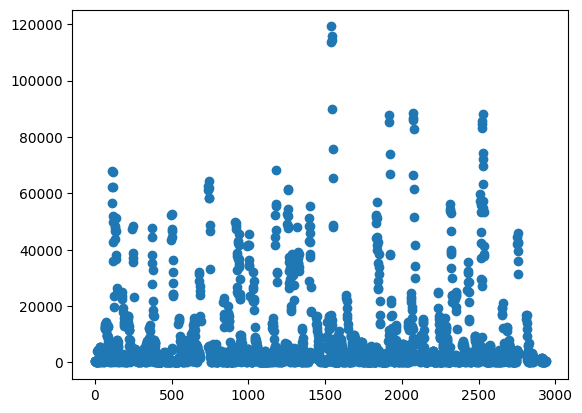

In [116]:
plt.scatter(df['GDP'].index,df['GDP'])

In [117]:
print(df['GDP'].max())
print(df['GDP'].min())
print(df['GDP'].mean())
print(df['GDP'].median())
print(df['GDP'].mode()[0])

119172.7418
1.68135
7483.158469138474
1766.947595
1.68135


In [118]:
df['GDP'].isna().sum()

448

In [119]:
df['GDP']=df['GDP'].fillna(df['GDP'].mean())

In [120]:
df['GDP'].isna().sum()

0

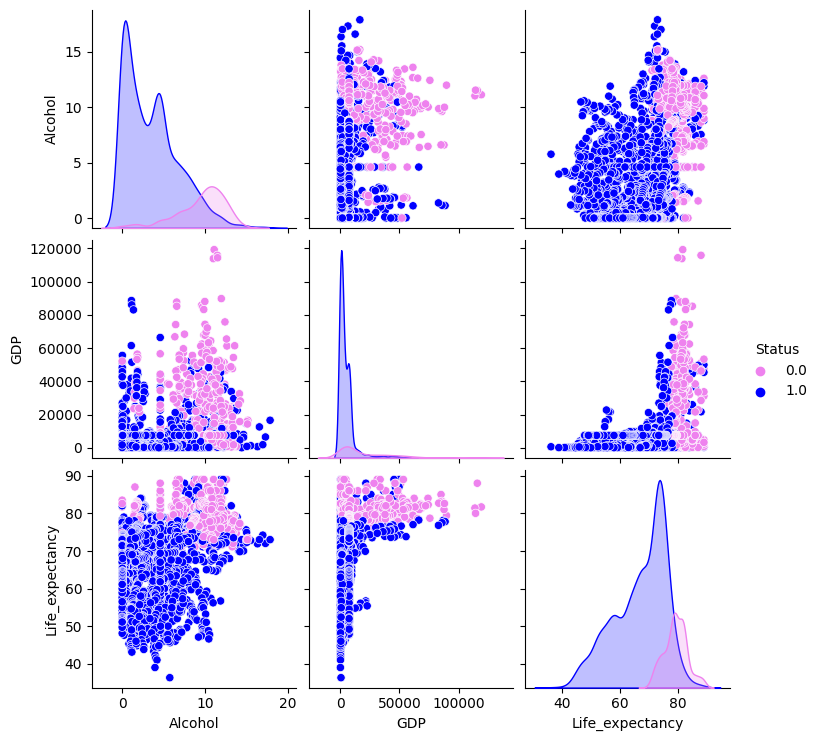

In [121]:
sns.pairplot(data=df[['Alcohol','GDP','Life_expectancy','Status']],
            hue='Status',palette=['Violet','Blue']);    # 1 > Developing
                                                        # 0 > Developed

In [122]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'thinness_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

### Population

In [123]:
df['Population']

0       33736494.0
1         327582.0
2       31731688.0
3        3696958.0
4        2978599.0
           ...    
2933    12777511.0
2934    12633897.0
2935      125525.0
2936    12366165.0
2937    12222251.0
Name: Population, Length: 2938, dtype: float64

In [124]:
print(df['Population'].max())
print(df['Population'].min())
print(df['Population'].mean())
print(df['Population'].median())
print(df['Population'].mode()[0])

1293859294.0
34.0
12753375.120052494
1386542.0
444.0


In [125]:
df['Population']=df['Population'].fillna(df['Population'].mean())

In [126]:
df['Population'].isna().sum()

0

<AxesSubplot: xlabel='Population', ylabel='Density'>

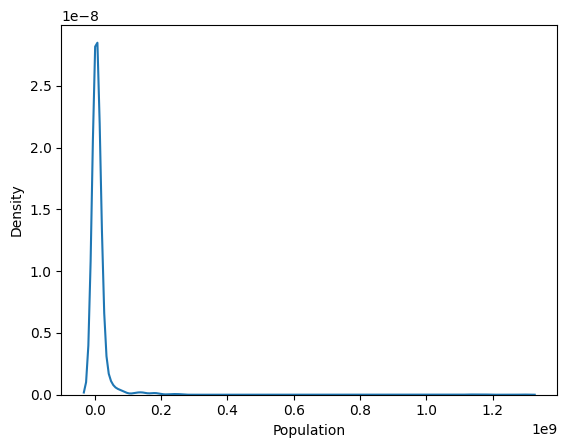

In [127]:
sns.kdeplot(df['Population'])

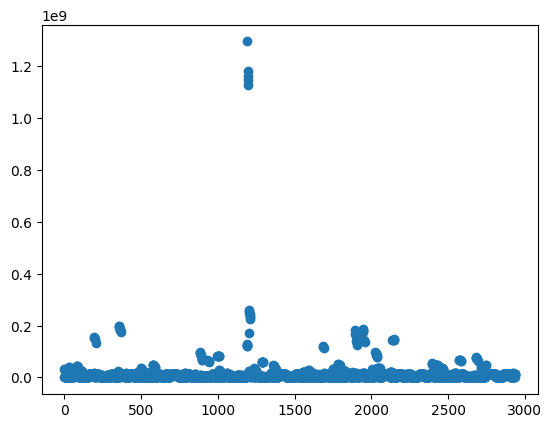

In [128]:
plt.scatter(df['Population'].index,df['Population'])

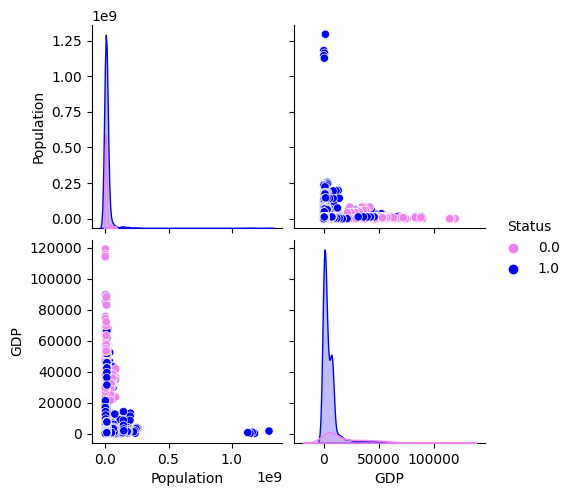

In [129]:
sns.pairplot(data=df[['Population','GDP','Status']],
            hue='Status',palette=['violet','Blue']);

In [130]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'thinness_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

### thinness_1_19_years

In [131]:
df['thinness_1_19_years'].isna().sum()

34

In [132]:
df['thinness_1_19_years']

0       17.2
1       17.5
2       17.7
3       17.9
4       18.2
        ... 
2933     9.4
2934     9.8
2935     1.2
2936     1.6
2937    11.0
Name: thinness_1_19_years, Length: 2938, dtype: float64

<AxesSubplot: xlabel='thinness_1_19_years', ylabel='Density'>

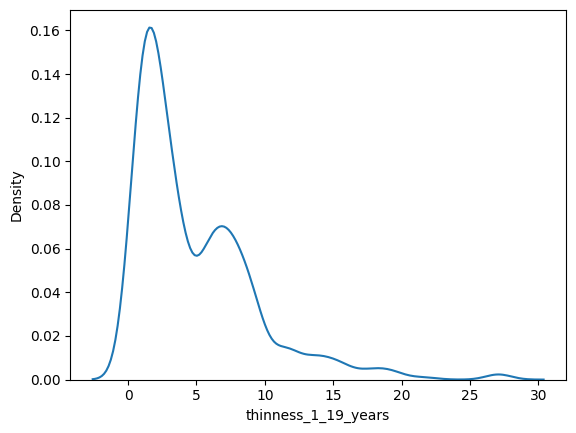

In [133]:
sns.kdeplot(df['thinness_1_19_years'])

In [134]:
print(df['thinness_1_19_years'].max())
print(df['thinness_1_19_years'].min())
print(df['thinness_1_19_years'].mean())
print(df['thinness_1_19_years'].median())
print(df['thinness_1_19_years'].mode()[0])

27.7
0.1
4.839703856749312
3.3
1.0


In [135]:
df['thinness_1_19_years']=df['thinness_1_19_years'].fillna(df['thinness_1_19_years'].mean())

In [136]:
df['thinness_1_19_years'].isna().sum()

0

In [137]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'thinness_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

### thinness_5_9_years

<AxesSubplot: xlabel='thinness_5_9_years', ylabel='Density'>

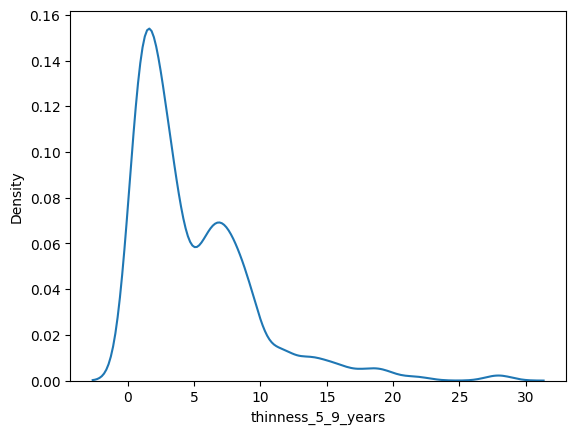

In [138]:
sns.kdeplot(df['thinness_5_9_years'])

In [139]:
df['thinness_5_9_years'].isna().sum()

34

In [140]:
print(df['thinness_5_9_years'].max())
print(df['thinness_5_9_years'].min())
print(df['thinness_5_9_years'].mean())
print(df['thinness_5_9_years'].median())
print(df['thinness_5_9_years'].mode()[0])

28.6
0.1
4.870316804407714
3.3
0.9


In [141]:
df['thinness_5_9_years']=df['thinness_5_9_years'].fillna(df['thinness_5_9_years'].mean())

In [142]:
df['thinness_5_9_years'].isna().sum()

0

In [143]:
df['Income_composition_of_resources'].isna().sum()

167

<AxesSubplot: xlabel='Income_composition_of_resources', ylabel='Density'>

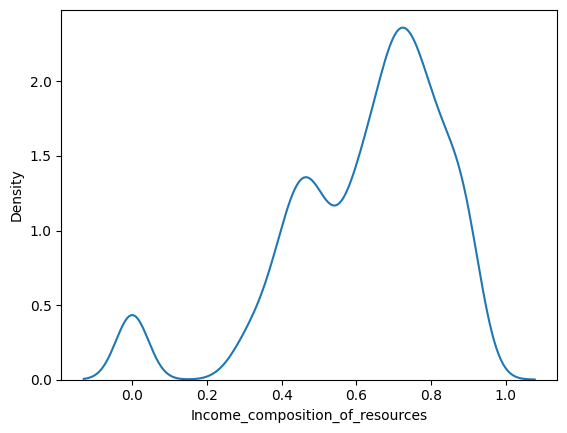

In [144]:
sns.kdeplot(df['Income_composition_of_resources'])

In [145]:
print(df['Income_composition_of_resources'].max())
print(df['Income_composition_of_resources'].min())
print(df['Income_composition_of_resources'].mean())
print(df['Income_composition_of_resources'].median())
print(df['Income_composition_of_resources'].mode()[0])

0.948
0.0
0.6275510645976182
0.677
0.0


In [146]:
df['Income_composition_of_resources']=df['Income_composition_of_resources'].fillna(df['Income_composition_of_resources'].mean())

In [147]:
df['Income_composition_of_resources'].isna().sum()

0

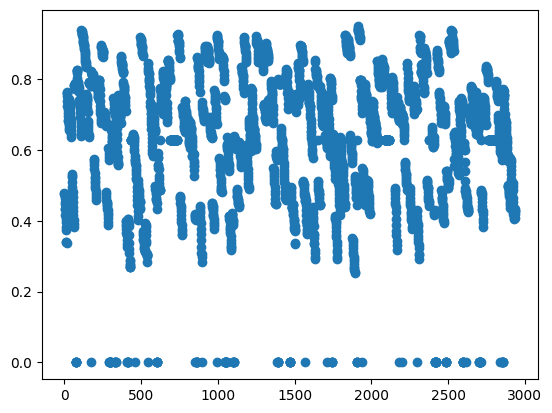

In [148]:
#plt.figure(figsize=(10,10))
plt.scatter(df['Income_composition_of_resources'].index,df['Income_composition_of_resources'])

In [149]:
df['Schooling']

0       10.1
1       10.0
2        9.9
3        9.8
4        9.5
        ... 
2933     9.2
2934     9.5
2935    10.0
2936     9.8
2937     9.8
Name: Schooling, Length: 2938, dtype: float64

In [150]:
df['Schooling'].isna().sum()

163

<AxesSubplot: xlabel='Schooling', ylabel='Density'>

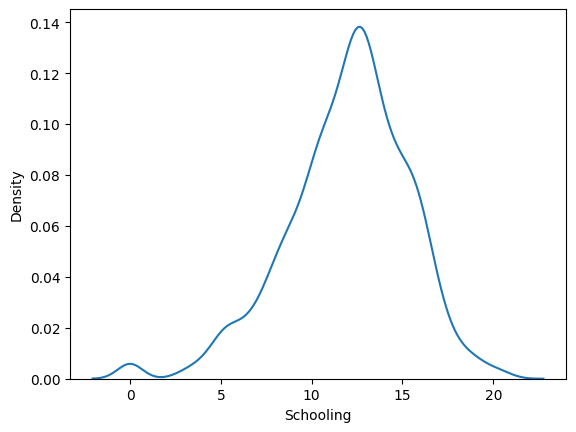

In [151]:
sns.kdeplot(df['Schooling'])

In [152]:
print(df['Schooling'].max())
print(df['Schooling'].min())
print(df['Schooling'].mean())
print(df['Schooling'].median())
print(df['Schooling'].mode()[0])

20.7
0.0
11.992792792792793
12.3
12.9


In [153]:
df['Schooling']=df['Schooling'].fillna(df['Schooling'].mean())

In [154]:
df['Schooling'].isna().sum()

0

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   float64
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   float64
 3   Life_expectancy                  2938 non-null   float64
 4   Adult_Mortality                  2938 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2938 non-null   float64
 11  under_five_deaths                2938 non-null   int64  
 12  Polio               

In [156]:
df[['Year','infant_deaths','Measles','under_five_deaths']]=df[['Year','infant_deaths','Measles','under_five_deaths']].astype('float')

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   float64
 1   Year                             2938 non-null   float64
 2   Status                           2938 non-null   float64
 3   Life_expectancy                  2938 non-null   float64
 4   Adult_Mortality                  2938 non-null   float64
 5   infant_deaths                    2938 non-null   float64
 6   Alcohol                          2938 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2938 non-null   float64
 9   Measles                          2938 non-null   float64
 10  BMI                              2938 non-null   float64
 11  under_five_deaths                2938 non-null   float64
 12  Polio               

In [158]:
df.isna().sum()

Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under_five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV_AIDS                           0
GDP                                0
Population                         0
thinness_1_19_years                0
thinness_5_9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

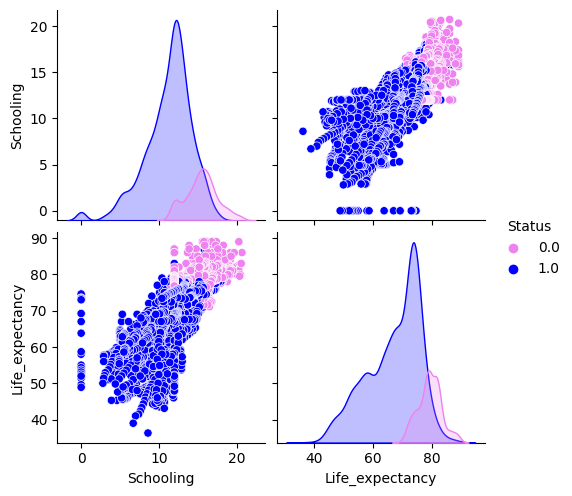

In [159]:
sns.pairplot(data=df[['Schooling','Life_expectancy','Status']],
            hue='Status',palette=['Violet','Blue'])

In [160]:
df

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
0,0.0,2015.0,1.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0.0,2014.0,1.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0.0,2013.0,1.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0.0,2012.0,1.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0.0,2011.0,1.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192.0,2004.0,1.0,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,27.1,42.0,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192.0,2003.0,1.0,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,26.7,41.0,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192.0,2002.0,1.0,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,26.3,40.0,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,192.0,2001.0,1.0,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,25.9,39.0,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [161]:
x=df.drop('Life_expectancy',axis=1)
y=df['Life_expectancy']

In [162]:
x.head()

,Country,Year,Status,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
0,0.0,2015.0,1.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0.0,2014.0,1.0,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0.0,2013.0,1.0,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0.0,2012.0,1.0,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0.0,2011.0,1.0,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [163]:
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life_expectancy, Length: 2938, dtype: float64

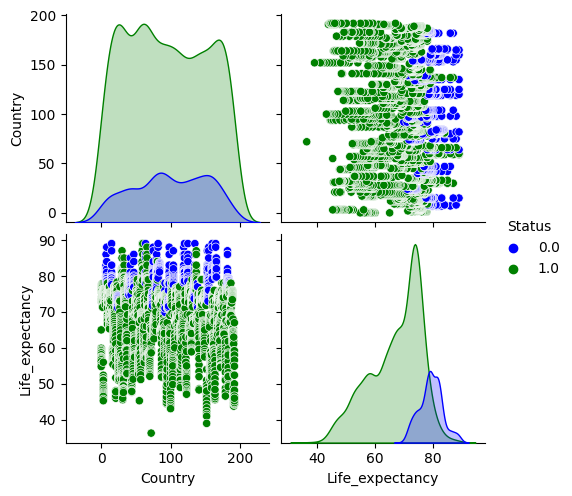

In [164]:
sns.pairplot(data=df[['Country','Life_expectancy','Status']],
            hue='Status',palette=['Blue','Green'])

In [166]:
df.shape

(2938, 22)

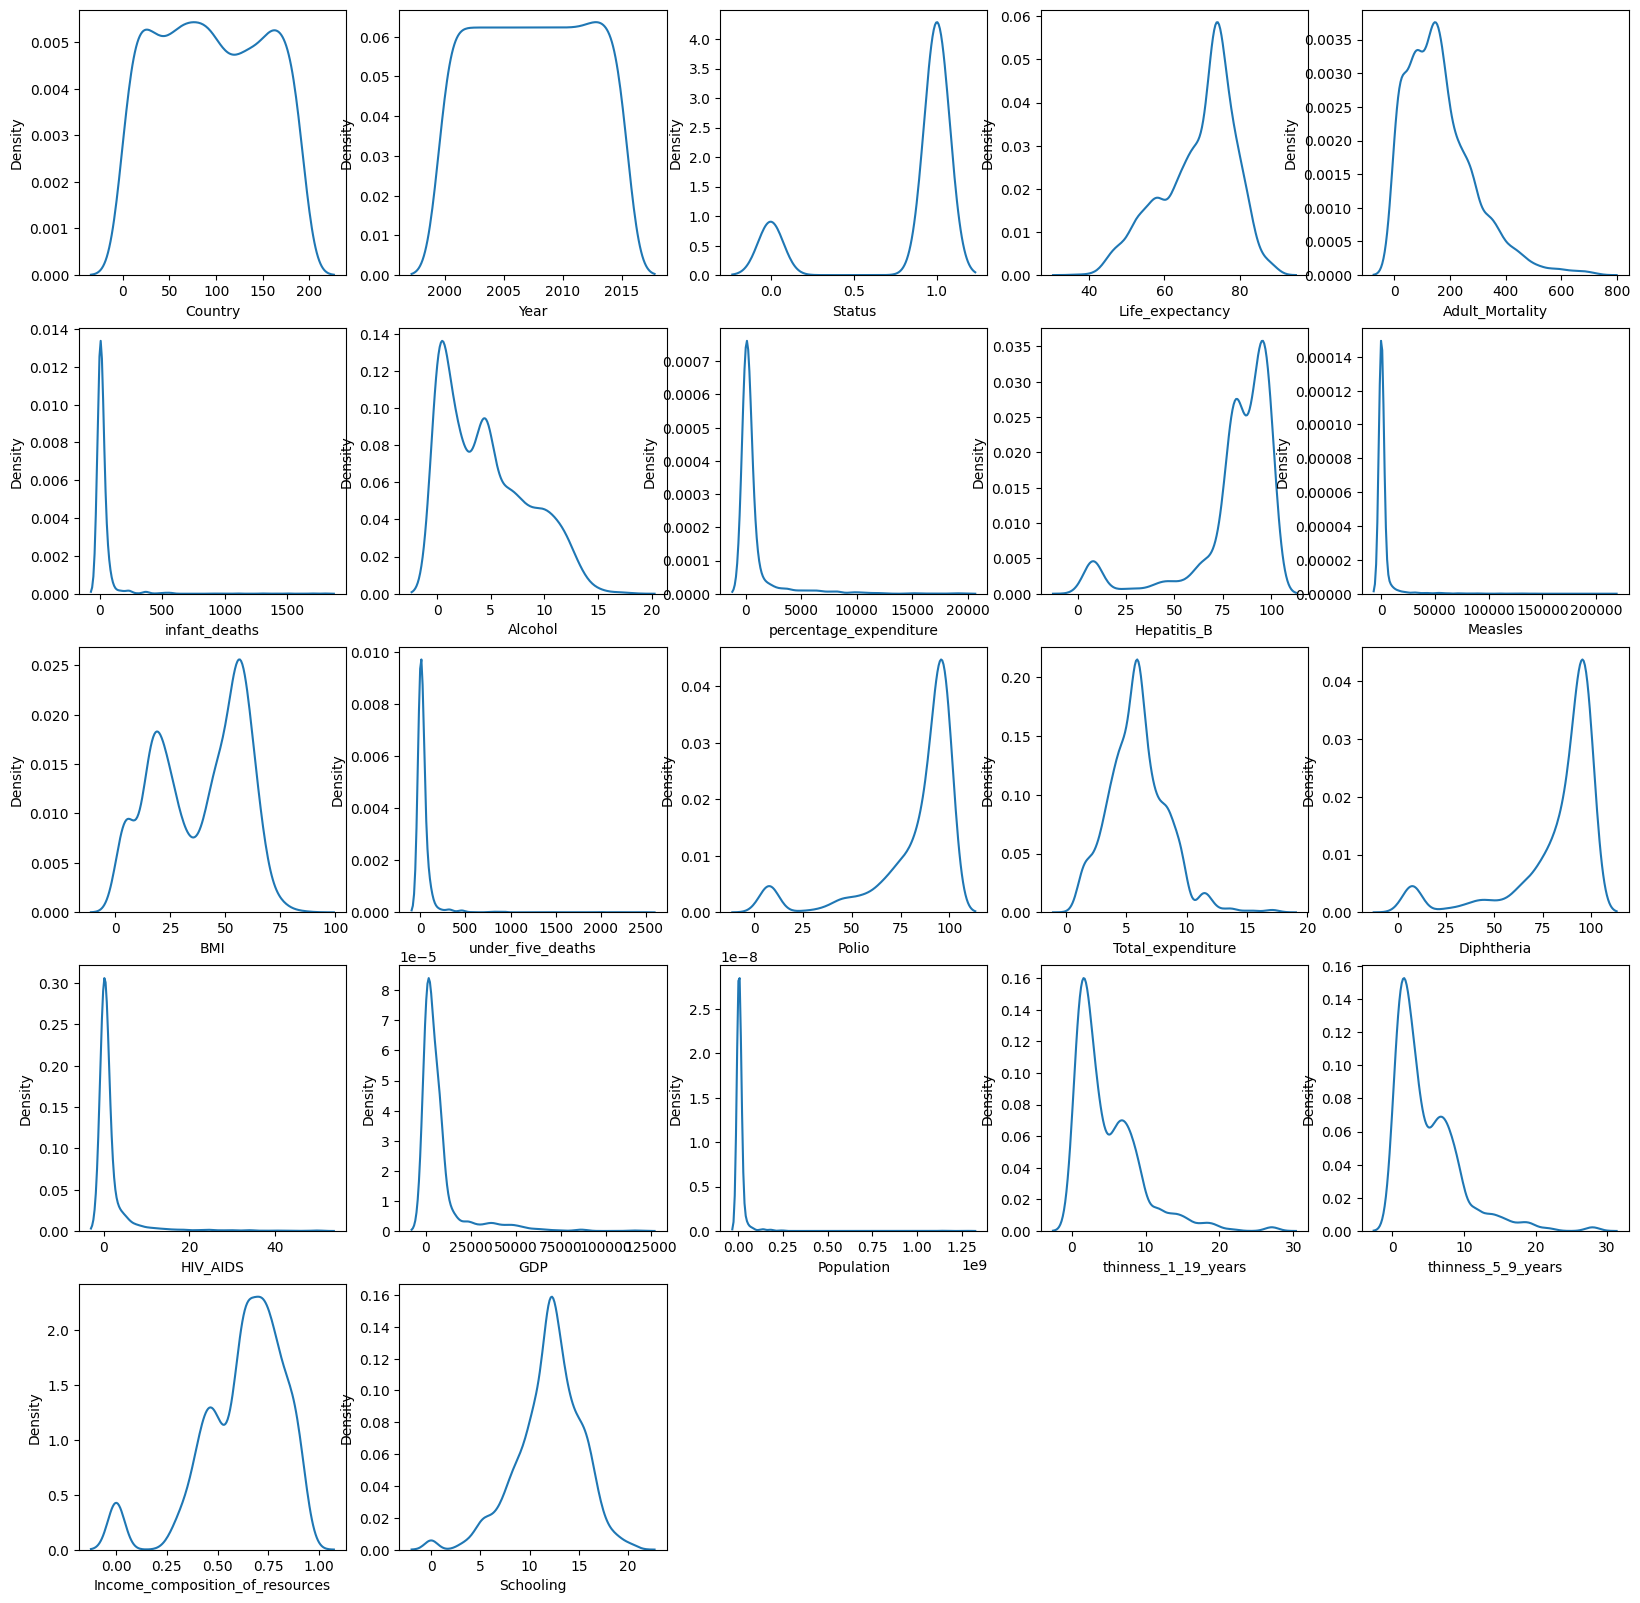

In [167]:
i=1
plt.figure(figsize=(20,20))
for col in df.columns:
    plt.subplot(5,5,i)
    sns.kdeplot(df[col])
    i+=1

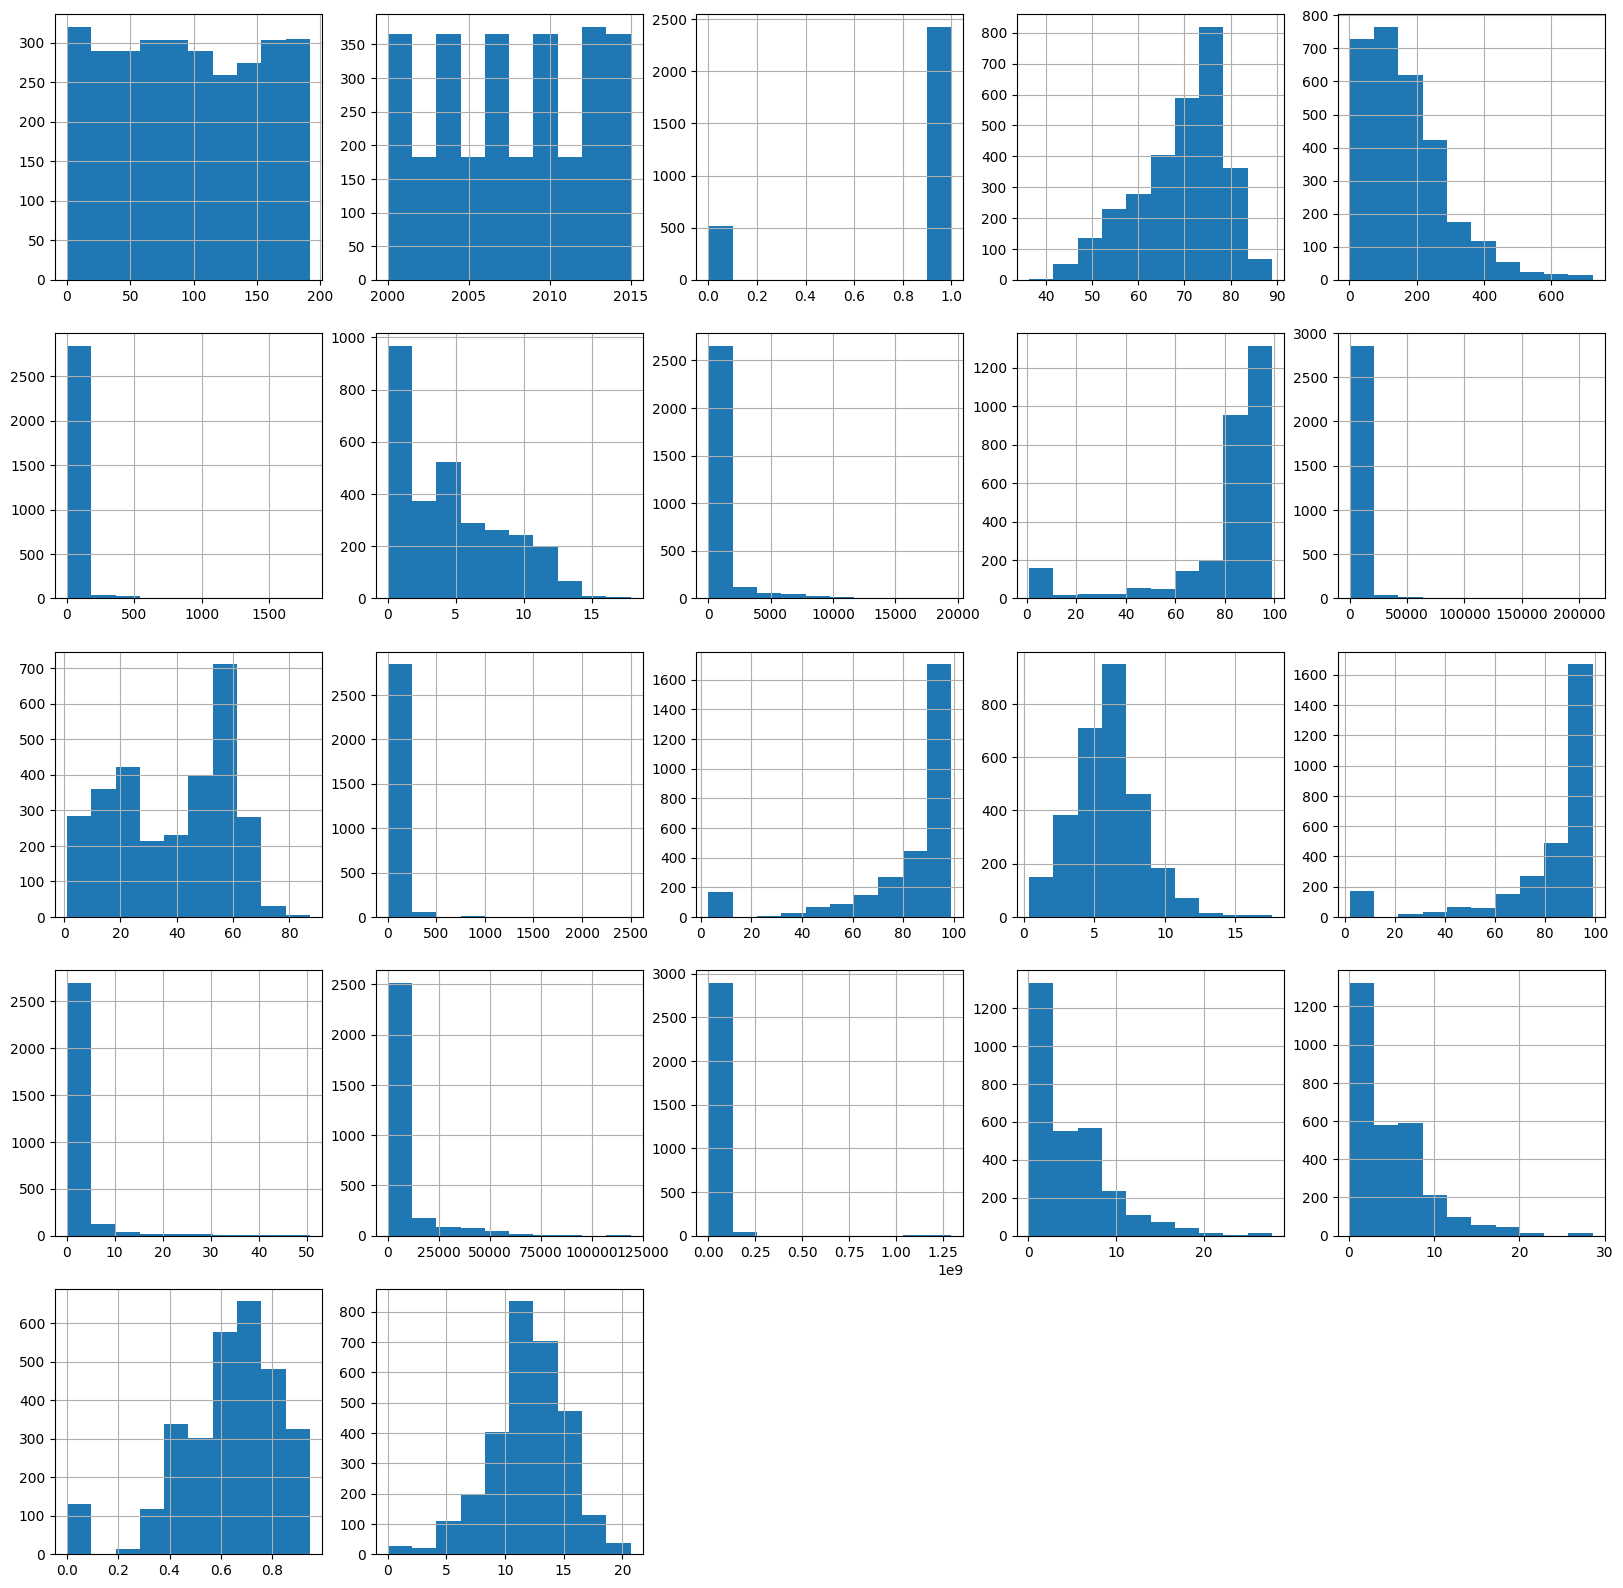

In [169]:
i=1
plt.figure(figsize=(20,20))
for col in df.columns:
    plt.subplot(5,5,i)
    df[col].hist()
    i+=1

In [171]:
df.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
0,0.0,2015.0,1.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0.0,2014.0,1.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0.0,2013.0,1.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0.0,2012.0,1.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0.0,2011.0,1.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [173]:
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life_expectancy, Length: 2938, dtype: float64

### Model Training

In [176]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [178]:
dt_model=DecisionTreeRegressor()
dt_model.fit(x_train,y_train)

DecisionTreeRegressor()

### Evaluation Model for test data

In [179]:
y_pred=dt_model.predict(x_test)

In [180]:
MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
R2_Score=r2_score(y_test,y_pred)

print(f"MAE:{MAE}")
print(f"MSE:{MSE}")
print(f"R2_Score:{R2_Score}")

MAE:1.6247619047619049
MSE:7.859374149659866
R2_Score:0.9195843025288026


### Evaluation Model for train data

In [183]:
y_pred_train=dt_model.predict(x_train)

In [184]:
MAE=mean_absolute_error(y_train,y_pred_train)
MSE=mean_squared_error(y_train,y_pred_train)
R2_Score=r2_score(y_train,y_pred_train)

print(f"MAE:{MAE}")
print(f"MSE:{MSE}")
print(f"R2_Score:{R2_Score}")

MAE:9.676024545076262e-18
MSE:6.875228951540366e-32
R2_Score:1.0


### Hyperparameter Tuning

In [193]:
start_time=time.time()

In [194]:
dt_model=DecisionTreeRegressor()
param_grid={"criterion":['squared_error','absolute_error'],
           "max_depth":np.arange(3,15),
           "min_samples_split":np.arange(2,20),
           "min_samples_leaf":np.arange(2,15)}

In [195]:
rscv_dt_model=RandomizedSearchCV(dt_model,param_grid,cv=5)
rscv_dt_model.fit(x_train,y_train)
rscv_dt_model.best_estimator_

DecisionTreeRegressor(max_depth=13, min_samples_leaf=3, min_samples_split=18)

In [196]:
end_time=time.time()

In [197]:
total_time=end_time-start_time

In [198]:
total_time

47.50052857398987

In [200]:
new_dt_model=rscv_dt_model.best_estimator_

### Model evaluation with test data

In [201]:
y_pred=new_dt_model.predict(x_test)

In [202]:
MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
R2_Score=r2_score(y_test,y_pred)

print(f"MAE:{MAE}")
print(f"MSE:{MSE}")
print(f"R2_Score:{R2_Score}")

MAE:1.7488202002418147
MSE:6.679785825234853
R2_Score:0.9316536373169453


### Model Evaluation with train data

In [203]:
y_pred_train=new_dt_model.predict(x_train)

In [204]:
MAE=mean_absolute_error(y_train,y_pred_train)
MSE=mean_squared_error(y_train,y_pred_train)
R2_Score=r2_score(y_train,y_pred_train)

print(f"MAE:{MAE}")
print(f"MSE:{MSE}")
print(f"R2_Score:{R2_Score}")

MAE:1.0203599842773676
MSE:2.2929389155094215
R2_Score:0.9739021590533516


### Post Pruning

In [206]:
dt1_model=DecisionTreeRegressor()
dt1_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [211]:
result=dt1_model.cost_complexity_pruning_path(x_train,y_train)

In [212]:
result

{'ccp_alphas': array([0.00000000e+00, 4.12843714e-16, 4.12843714e-16, ...,
        4.93342820e+00, 1.03984933e+01, 4.98731545e+01]),
 'impurities': array([-2.10859927e-13, -2.10447083e-13, -2.10034239e-13, ...,
         2.75876858e+01,  3.79861792e+01,  8.78593337e+01])}

In [213]:
ccp_list=result['ccp_alphas']

In [214]:
ccp_list

array([0.00000000e+00, 4.12843714e-16, 4.12843714e-16, ...,
       4.93342820e+00, 1.03984933e+01, 4.98731545e+01])

In [215]:
train_accuracy_score=[]
test_accuracy_score=[]
for i in ccp_list:
    dt1_model=DecisionTreeRegressor(ccp_alpha=i)
    dt1_model.fit(x_train,y_train)
    train_accuracy_score.append(dt1_model.score(x_train,y_train))
    test_accuracy_score.append(dt1_model.score(x_test,y_test))

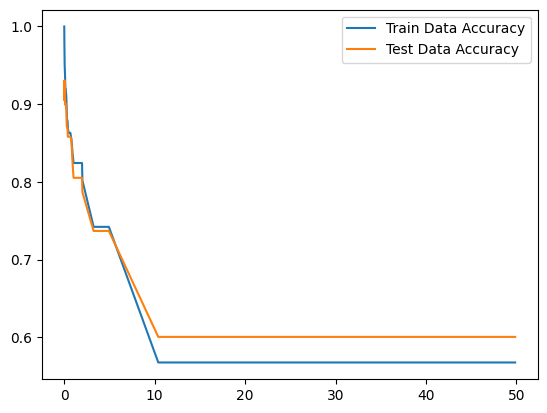

In [221]:
fig, ax = plt.subplots()
ax.plot(ccp_list,train_accuracy_score, label = "Train Data Accuracy")
ax.plot(ccp_list,test_accuracy_score, label = "Test Data Accuracy")
ax.legend()

In [217]:
np.where(test_accuracy_score==max(test_accuracy_score))

(array([1819], dtype=int64),)

In [218]:
test_accuracy_score[1819]

0.9306618021616506

In [219]:
train_accuracy_score[1819]

0.9728290494890507

In [220]:
ccp_list[1819]

0.01899228518016699

In [222]:
dt2_model=DecisionTreeRegressor(ccp_alpha=ccp_list[1819])
dt2_model.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.01899228518016699)

### model evaluation with test data

In [223]:
y_pred=dt2_model.predict(x_test)

In [224]:
MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
R2_Score=r2_score(y_test,y_pred)

print(f"MAE:{MAE}")
print(f"MSE:{MSE}")
print(f"R2_Score:{R2_Score}")

MAE:1.8272889891619513
MSE:7.272908864484144
R2_Score:0.9255849094539853


### model evaluation with train data

In [225]:
y_pred_train=dt2_model.predict(x_train)

In [226]:
MAE=mean_absolute_error(y_train,y_pred_train)
MSE=mean_squared_error(y_train,y_pred_train)
R2_Score=r2_score(y_train,y_pred_train)

print(f"MAE:{MAE}")
print(f"MSE:{MSE}")
print(f"R2_Score:{R2_Score}")

MAE:1.1441921468783733
MSE:2.3872216067719347
R2_Score:0.9728290494890507


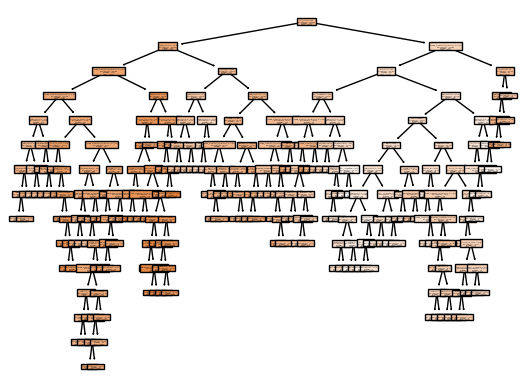

In [228]:
# plt.figure(figsize=(200,100))
plot_tree(dt2_model,feature_names=x.columns, filled=True)
plt.show()

In [ ]:
# Country	Year	Status	Life_expectancy	Adult_Mortality	infant_deaths	Alcohol	percentage_expenditure	Hepatitis_B	Measles	BMI	under_five_deaths	Polio	Total_expenditure	Diphtheria	HIV_AIDS	GDP	Population	thinness_1-19_years	thinness_5-9_years	Income_composition_of_resources	Schooling
# 0.0	  2015.0	1.0	   65.0	           263.0	        62.0	       0.01	    71.279624	            65.0	    1154.0	19.1	83.0	        6.0	    8.16	            65.0	    0.1	584.259210	33736494.0	17.2	            17.3	0.479	10.1
# 0.0	2014.0	1.0	59.9	271.0	64.0	0.01	73.523582	62.0	492.0	18.6	86.0	58.0	8.18	62.0	0.1	612.696514	327582.0	17.5	17.5	0.476	10.0
# 0.0	2013.0	1.0	59.9	268.0	66.0	0.01	73.219243	64.0	430.0	18.1	89.0	62.0	8.13	64.0	0.1	631.744976	31731688.0	17.7	17.7	0.470	9.9
# 0.0	2012.0	1.0	59.5	272.0	69.0	0.01	78.184215	67.0	2787.0	17.6	93.0	67.0	8.52	67.0	0.1	669.959000	3696958.0	17.9	18.0	0.463	9.8
# 0.0	2011.0	1.0	59.2	275.0	71.0	0.01	7.097109	68.0	3013.0	17.2	97.0	68.0	7.87	68.0	0.1	63.537231	2978599.0	18.2	18.2	0.454	9.5

In [229]:
Country=0
Year=2015
Status=1
Adult_Mortality=263
infant_deaths=62
Alcohol=0.01
percentage_expenditure=71.2796
Hepatitis_B=65
Measles=1154
BMI=19.1
under_five_deaths=83
Polio=6
Total_expenditure=8.16
Diphtheria=65
HIV_AIDS=0.1
GDP=584.2592
Population=33736494
thinness_1_19_years=17.2
thinness_5_9_years=17.3
Income_composition_of_resources=0.479
Schooling=10.1

pred_input=np.array([Country,Year,Status,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,
                     Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,
                     thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling])

pred_output=dt2_model.predict([pred_input])[0]

C:\Users\SUNIL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [230]:
# dt2_model
pred_output

63.428070175438606

In [231]:
# new_dt_model
pred_output1=new_dt_model.predict([pred_input])[0]
pred_output1

C:\Users\SUNIL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


63.11818181818182

In [330]:
df1=pd.read_csv('Life_Expectancy_Data.csv')

In [331]:
df1.head(2)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0


In [332]:
arr1=df1['Country'].unique()

In [334]:
#arr1

In [335]:
d=pd.DataFrame(arr1,columns=['Index'])

In [336]:
d['Country']=np.arange(len(d))

In [337]:
d

,Index,Country
0,Afghanistan,0
1,Albania,1
2,Algeria,2
3,Angola,3
4,Antigua and Barbuda,4
...,...,...
188,Venezuela (Bolivarian Republic of),188
189,Viet Nam,189
190,Yemen,190
191,Zambia,191


In [338]:
d.set_index('Index',inplace=True)

In [339]:
d

,Country
Index,
Afghanistan,0
Albania,1
Algeria,2
Angola,3
Antigua and Barbuda,4
...,...
Venezuela (Bolivarian Republic of),188
Viet Nam,189
Yemen,190


In [342]:
project_data=d.to_dict()

In [344]:
project_data['columns']=list(x.columns)

In [347]:
project_data['Status']={"Developing":0,"Developed":1}

In [350]:
project_data['Status']['Developed']

1

In [351]:
import json 
import pickle

In [352]:
new_dt_model

DecisionTreeRegressor(max_depth=13, min_samples_leaf=3, min_samples_split=18)

In [357]:
dt2_model

DecisionTreeRegressor(ccp_alpha=0.01899228518016699)

In [355]:
# project_data

In [356]:
with open("project_data.json","w") as f1:
    json.dump(project_data,f1)

In [358]:
with open("Life_expectancy_data.pickle","wb") as f2:
    pickle.dump(dt2_model,f2)

In [363]:
df1.loc[(df1['Country']=="India")]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1186,India,2015,Developing,68.3,181.0,910,NaN,0.000000,87.0,90387,18.7,1100,86.0,NaN,87.0,0.2,1613.188780,1.395398e+06,26.7,27.3,0.615,11.6
1187,India,2014,Developing,68.0,184.0,957,3.07,86.521539,79.0,79563,18.1,1200,84.0,4.69,85.0,0.2,1573.118890,1.293859e+09,26.8,27.4,0.607,11.6
1188,India,2013,Developing,67.6,187.0,1000,3.11,67.672304,7.0,13822,17.5,1300,82.0,4.53,83.0,0.2,1452.195373,1.278562e+08,26.8,27.5,0.599,11.5
1189,India,2012,Developing,67.3,19.0,1100,3.10,64.969645,73.0,18668,17.0,1400,79.0,4.39,82.0,0.2,1446.985410,1.263659e+08,26.9,27.6,0.590,11.3
1190,India,2011,Developing,66.8,193.0,1100,3.00,64.605901,44.0,33634,16.4,1500,79.0,4.33,82.0,0.2,1461.671957,1.247236e+08,26.9,27.7,0.580,10.8
1191,India,2010,Developing,66.4,196.0,1200,2.77,57.733599,38.0,31458,15.9,1600,76.0,4.28,79.0,0.2,1345.771530,1.239869e+07,27.0,27.8,0.569,10.4
1192,India,2009,Developing,66.0,2.0,1300,2.50,0.844186,37.0,56188,15.4,1700,73.0,4.38,74.0,0.2,19.317765,1.214271e+08,27.0,27.8,0.563,10.5
1193,India,2008,Developing,65.5,23.0,1300,1.93,43.030433,29.0,44258,14.9,1800,69.0,4.34,7.0,0.3,991.484634,1.197147e+08,27.0,27.9,0.556,10.2
1194,India,2007,Developing,65.2,26.0,1400,1.59,5.234770,6.0,41144,14.4,1900,67.0,4.23,64.0,0.3,118.166373,1.179681e+09,27.1,28.0,0.546,9.9
1195,India,2006,Developing,64.8,28.0,1500,1.37,34.859427,6.0,64185,13.9,2000,66.0,4.25,65.0,0.3,792.259698,1.161978e+09,27.1,28.0,0.536,9.7


In [381]:
# pd.set_option("display.max_rows",None)

In [391]:
d1=df1.loc[(df1['Country']=="India")].to_dict('records')

In [392]:
d1

[{'Country': 'India',
  'Year': 2015,
  'Status': 'Developing',
  'Life expectancy ': 68.3,
  'Adult Mortality': 181.0,
  'infant deaths': 910,
  'Alcohol': nan,
  'percentage expenditure': 0.0,
  'Hepatitis B': 87.0,
  'Measles ': 90387,
  ' BMI ': 18.7,
  'under-five deaths ': 1100,
  'Polio': 86.0,
  'Total expenditure': nan,
  'Diphtheria ': 87.0,
  ' HIV/AIDS': 0.2,
  'GDP': 1613.18878,
  'Population': 1395398.0,
  ' thinness  1-19 years': 26.7,
  ' thinness 5-9 years': 27.3,
  'Income composition of resources': 0.615,
  'Schooling': 11.6},
 {'Country': 'India',
  'Year': 2014,
  'Status': 'Developing',
  'Life expectancy ': 68.0,
  'Adult Mortality': 184.0,
  'infant deaths': 957,
  'Alcohol': 3.07,
  'percentage expenditure': 86.52153895,
  'Hepatitis B': 79.0,
  'Measles ': 79563,
  ' BMI ': 18.1,
  'under-five deaths ': 1200,
  'Polio': 84.0,
  'Total expenditure': 4.69,
  'Diphtheria ': 85.0,
  ' HIV/AIDS': 0.2,
  'GDP': 1573.11889,
  'Population': 1293859294.0,
  ' thinness 